In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\shesh\Desktop\sheshank_doc\ML\datasets\HousingData.csv")

In [3]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [4]:
df["CRIM"].fillna(df["CRIM"].mean(), inplace=True) # fill CRIM with mean value
df["ZN"].fillna(0, inplace=True) # fill ZN with mode value, because 360 of the entries are 0
df["INDUS"].fillna(df["INDUS"].mean(), inplace=True) # fill INDUS with mean value
df["CHAS"].fillna(0, inplace=True) # fill CHAS with mode value, because 452 of the entries are 0
df["AGE"].fillna(df["AGE"].mean(), inplace=True) # fill AGE with mean value
df["LSTAT"].fillna(df["LSTAT"].mean(), inplace=True) # fill LSTAT with mean value

In [5]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [59]:
X,y=df.drop("MEDV",axis=1),df[["MEDV"]]

In [60]:
x_train,x_test,y_train,y_test=train_test_split(X,y)

In [61]:
x_test.shape

(127, 13)

In [62]:
y_test.shape

(127, 1)

In [63]:
# Fitting the model
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [66]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results=pd.DataFrame({"Actual":np.array(label).flatten(),"Predicted":predictions.flatten()})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [67]:
# predictions = model.predict(x_test)
# df_results=pd.DataFrame({"Actual":np.array(y_test).flatten(),"Predicted":predictions.flatten()})
df_results=calculate_residuals(model,x_test,y_test)

In [68]:
df_results.head()

,Actual,Predicted,Residuals
0,23.9,28.002059,-4.102059
1,14.6,18.030636,-3.430636
2,24.4,28.377451,-3.977451
3,23.2,21.300166,1.899834
4,31.5,30.751824,0.748176


### Linearity


The linear regression model assumes that there is a linear relationship between the independent and the dependent variables.

How can we find Linear relations?

Scatter plot: The simplest way to check for linearity is to plot the dependent variable against the independent variable(s) on a scatter plot. If the points form a linear pattern, then the relationship is linear.

Residual plot: A residual plot is a plot of the residuals (the difference between the actual value and the predicted value) against the predicted value. If the plot shows a random scattering of points around the horizontal axis with no apparent pattern, then the relationship is likely to be linear.

Linearity test:  Rainbow test, which tests the linearity assumption of a regression model. This test checks for non-linearity by adding squared and cubed terms of the predicted values to the regression model.

Correlation coefficient: The correlation coefficient is a measure of the linear relationship between two variables. If the correlation coefficient between the independent variable(s) and the dependent variable is close to 1 or -1, then the relationship is linear.
"


In [16]:
X.shape

(506, 13)

In [18]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

<AxesSubplot: xlabel='LSTAT', ylabel='MEDV'>

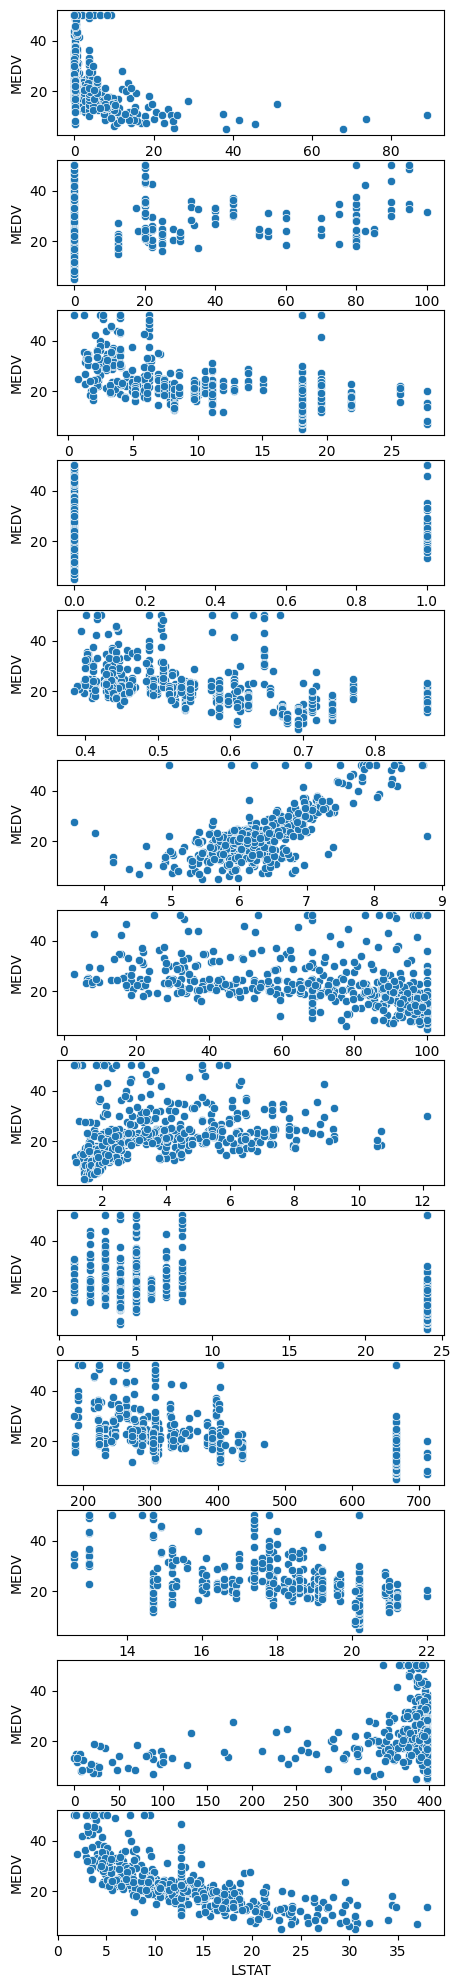

In [29]:
fig, ax = plt.subplots(13,figsize=(5,25))
sns.scatterplot(x="CRIM",y='MEDV',data=df,ax=ax[0])
sns.scatterplot(x="ZN",y='MEDV',data=df,ax=ax[1])
sns.scatterplot(x="INDUS",y='MEDV',data=df,ax=ax[2])
sns.scatterplot(x="CHAS",y='MEDV',data=df,ax=ax[3])
sns.scatterplot(x="NOX",y='MEDV',data=df,ax=ax[4])
sns.scatterplot(x="RM",y='MEDV',data=df,ax=ax[5])
sns.scatterplot(x="AGE",y='MEDV',data=df,ax=ax[6])
sns.scatterplot(x="DIS",y='MEDV',data=df,ax=ax[7])
sns.scatterplot(x="RAD",y='MEDV',data=df,ax=ax[8])
sns.scatterplot(x="TAX",y='MEDV',data=df,ax=ax[9])
sns.scatterplot(x="PTRATIO",y='MEDV',data=df,ax=ax[10])
sns.scatterplot(x="B",y='MEDV',data=df,ax=ax[11])
sns.scatterplot(x="LSTAT",y='MEDV',data=df,ax=ax[12])

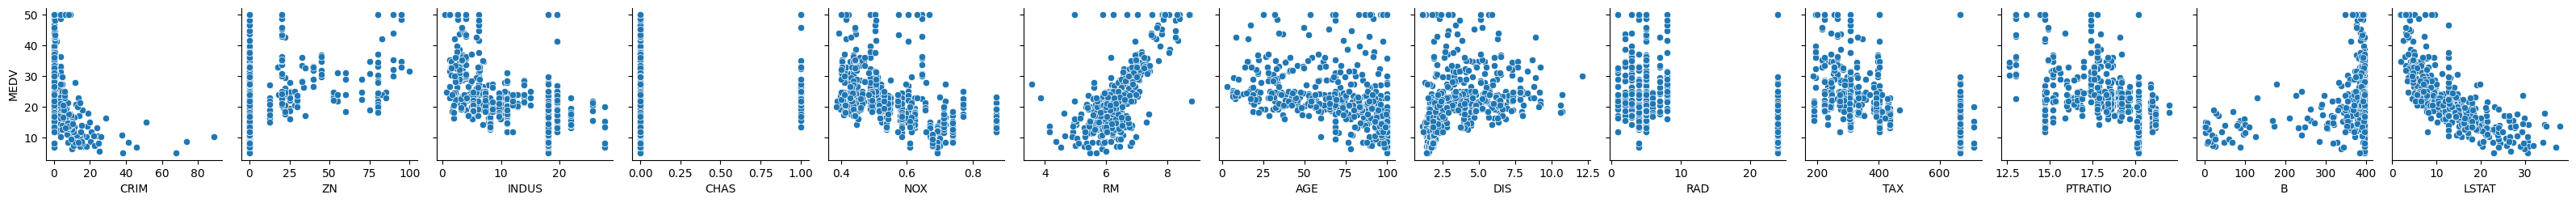

In [41]:
sns.pairplot(x_vars=df[X.columns], y_vars=df[y.columns],data=df)

In [39]:
df.corr()['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.362292
B          0.333461
DIS        0.249929
CHAS       0.183844
CRIM      -0.379695
AGE       -0.380223
RAD       -0.381626
NOX       -0.427321
TAX       -0.468536
INDUS     -0.478657
PTRATIO   -0.507787
LSTAT     -0.721975
Name: MEDV, dtype: float64

<AxesSubplot: >

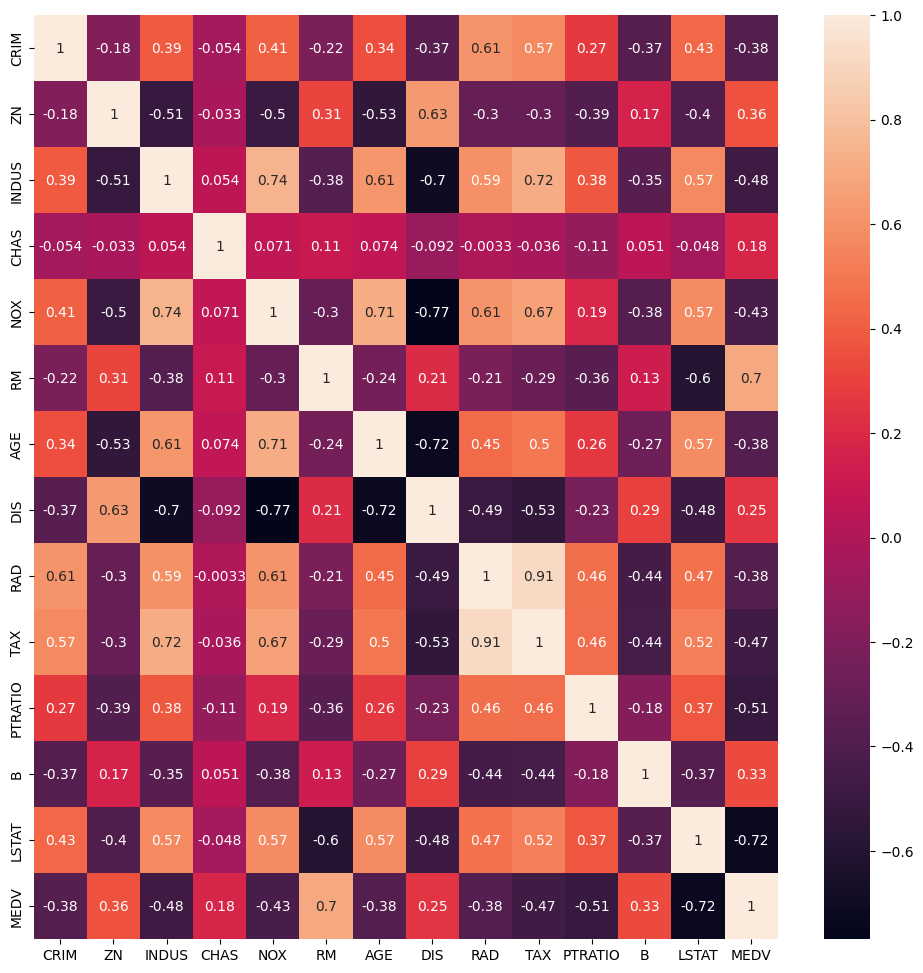

In [33]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

In [44]:
import statsmodels.api as sm
from statsmodels.stats.api import linear_rainbow

# Fit a linear regression model
X1 = sm.add_constant(X)  # Add intercept term to predictor variables
model = sm.OLS(y, X1).fit()

# Perform the Rainbow test
rainbow_statistic, rainbow_pvalue = linear_rainbow(model)

# Print the test results
print("Rainbow test statistic:", rainbow_statistic)
print("Rainbow test p-value:", rainbow_pvalue)


Rainbow test statistic: 0.5739399081675897
Rainbow test p-value: 0.9999926471528557


In the above example, X represents the predictor variables, y represents the response variable, and we have added an intercept term to the predictor variables using sm.add_constant. We then fit a linear regression model using sm.OLS and compute the Rainbow test statistic and p-value using the linear_rainbow function.


The null hypothesis of the Rainbow test is that the residuals are linearly distributed, and a small p-value suggests that there is evidence to reject this null hypothesis in favor of the alternative hypothesis of nonlinearity. Therefore, if the p-value is less than the significance level (e.g., 0.05), we may conclude that there is evidence of nonlinearity in the regression model.

## Residual plot

eval_env: 1


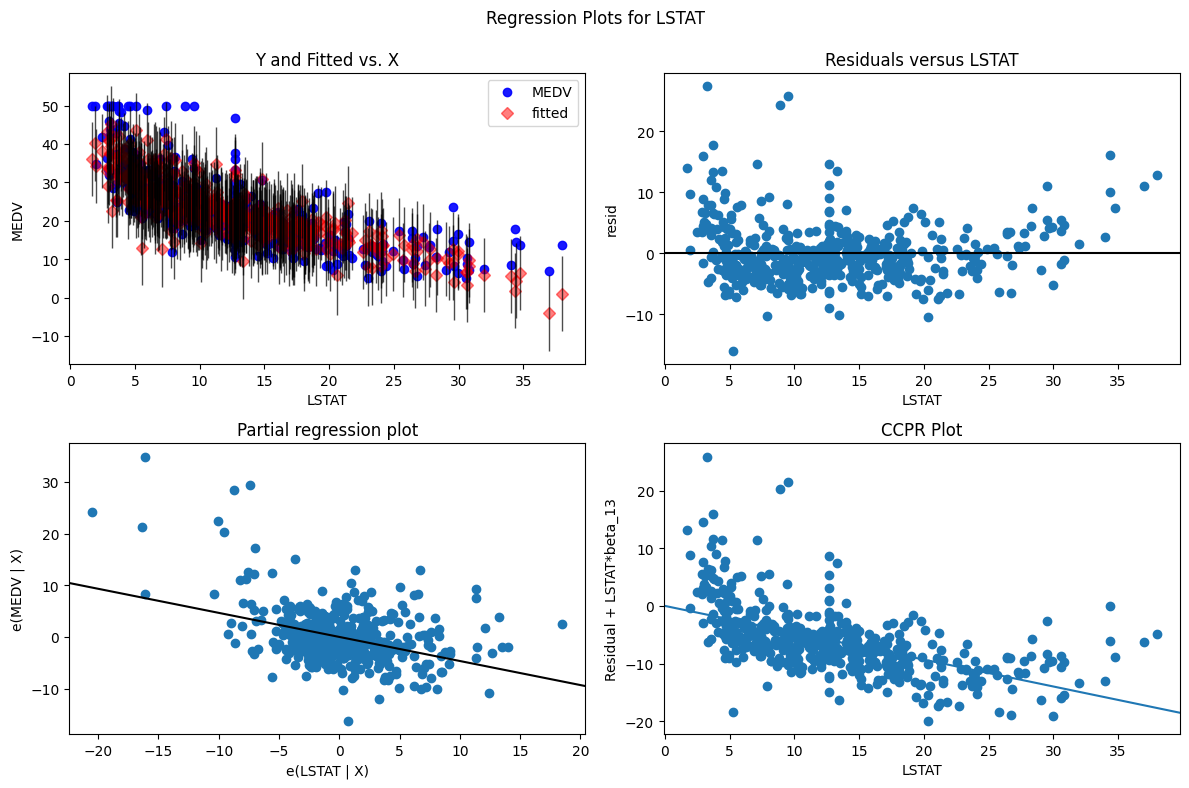

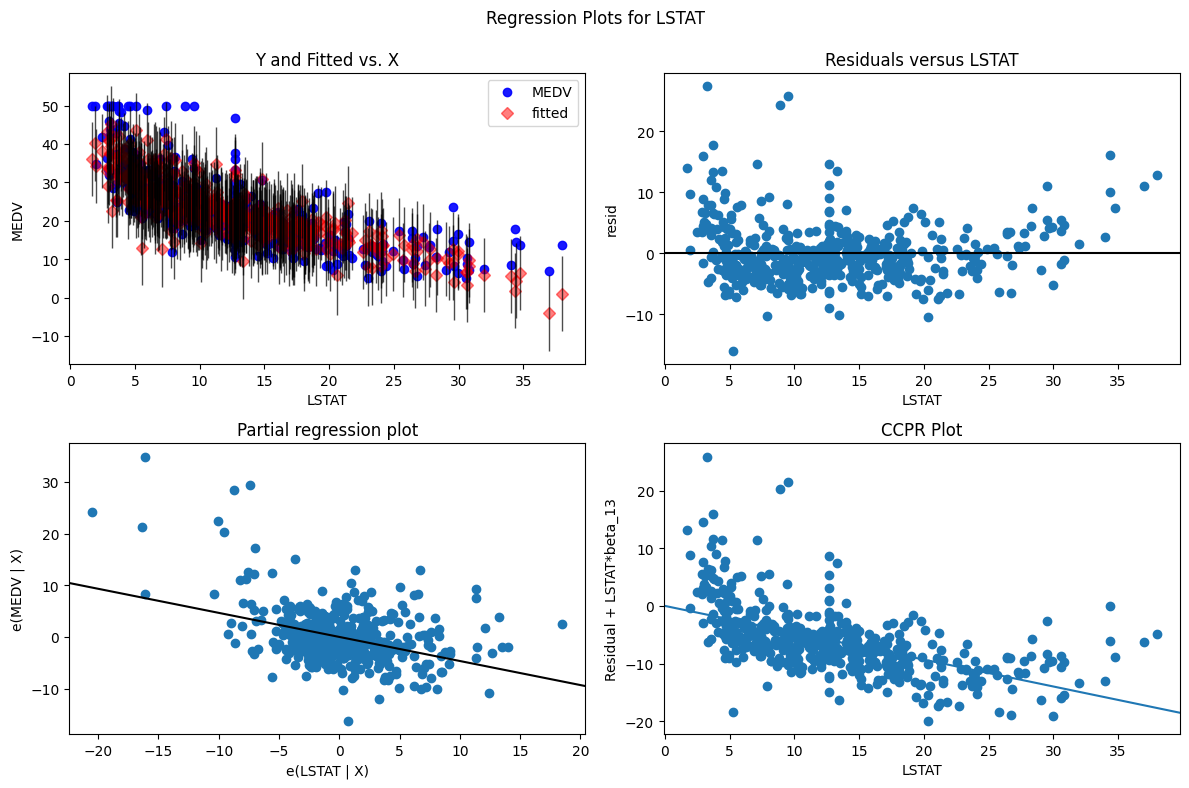

In [47]:
from statsmodels.graphics.regressionplots import plot_regress_exog
plot_regress_exog(model, "LSTAT", fig=plt.figure(figsize=(12, 8)))

The residual plot should exhibit a random scatter of points around a horizontal line at zero. If the plot shows a pattern, such as a U-shape or a curve, it suggests that the relationship between the predictor and the response variable is not linear. Additionally, if the plot shows a cone-like shape or the variance of the residuals increases or decreases across the range of predicted values, it suggests that the assumptions of homoscedasticity and constant variance are violated.

### Normality

"The residuals should follow Normal Distribution.

Ways to check Normal Distribution?

Histogram:  If the histogram has a bell-shaped curve, then the data may be normally distributed.

- Q-Q plot: A Q-Q plot is a graphical method of comparing a data distribution to a normal distribution. If the Q-Q plot shows the data points following a straight line, then the data may be normally distributed.

- Shapiro-Wilk test: The Shapiro-Wilk test is a statistical test that can be used to determine whether a sample comes from a normal distribution. If the p-value of the test is greater than the significance level (usually 0.05), then the data may be normally distributed.

- Kolmogorov-Smirnov test: The Kolmogorov-Smirnov test is a statistical test that can be used to determine whether a sample comes from a specific distribution, such as a normal distribution. If the p-value of the test is greater than the significance level (usually 0.05), then the data may be normally distributed.

- Skewness and Kurtosis: Skewness is a measure of the asymmetry of a distribution, while Kurtosis is a measure of the ""peakedness"" of a distribution. If the skewness and kurtosis values are close to zero, then the data may be normally distributed. A symmetric distribution has a skewness value of 0. As for kurtosis, a normal distribution has a kurtosis value of 3.

- Density plot: A density plot is a smoothed version of a histogram. If the density plot shows a bell-shaped curve, then the data may be normally distributed.

__What does it indicate if the residuals do not follow a normal distribution?__

If the residuals of a linear regression model do not follow a normal distribution, it can indicate that the assumptions of the linear regression model are violated, which can affect the accuracy and reliability of the model's results and predictions.


"


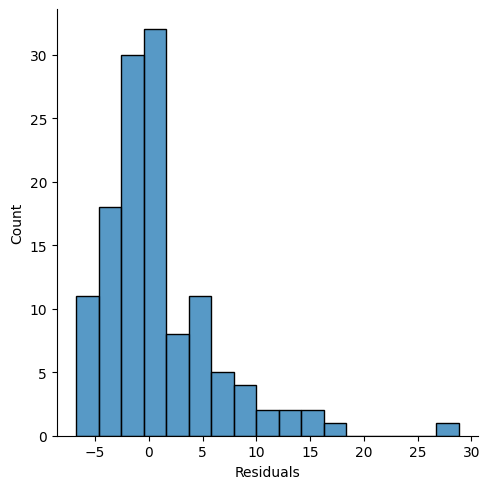

In [69]:
sns.displot(df_results["Residuals"])

<AxesSubplot: xlabel='Residuals', ylabel='Density'>

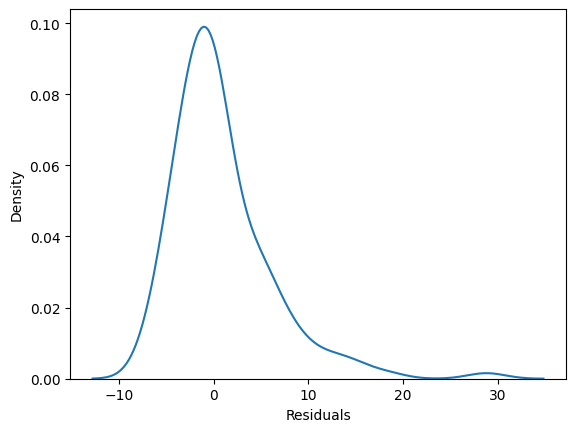

In [73]:
sns.kdeplot(df_results["Residuals"])

### Q-Q Plot

The resulting plot should display the data points on the y-axis and the expected values based on a normal distribution on the x-axis. If the data points fall close to the line, we can assume that the data are normally distributed. If the data points deviate from the line, we may conclude that the data are not normally distributed.

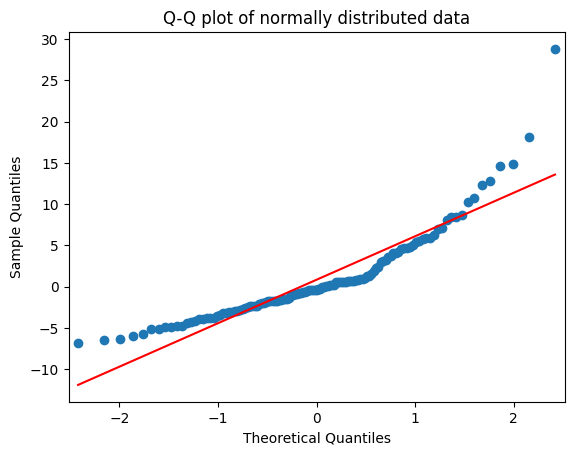

In [81]:
fig, ax = plt.subplots()
sm.qqplot(df_results["Residuals"], line='s', ax=ax)
ax.set_title('Q-Q plot of normally distributed data')
plt.show()

### Skewness and Kurtosis

The skewness value can range from -inf to +inf, where a value of 0 indicates a perfectly symmetrical distribution. A positive skewness value indicates a right-skewed distribution, while a negative skewness value indicates a left-skewed distribution.


The kurtosis value can also range from -inf to +inf, where a value of 0 indicates a normal distribution. A positive kurtosis value indicates a more peaked distribution (i.e., more of the data is concentrated around the mean) than a normal distribution, while a negative kurtosis value indicates a flatter distribution than a normal distribution.

In [74]:
import scipy.stats as stats

# Calculate skewness and kurtosis
skewness = stats.skew(df_results["Residuals"])
kurtosis = stats.kurtosis(df_results["Residuals"])

In [75]:
skewness

1.9338074332828876

In [76]:
kurtosis

5.995704636671043

### Shapiro-Wilk test
The Shapiro-Wilk test is a statistical test used to determine whether a set of data is normally distributed or not.

We  use the stats.shapiro function to perform the Shapiro-Wilk test on the data. The function returns two values: the test statistic and the p-value.

If the p-value is less than the significance level (usually 0.05), we reject the null hypothesis and conclude that the data are not normally distributed. If the p-value is greater than the significance level, we fail to reject the null hypothesis and conclude that the data are normally distributed.







In [78]:
# Perform Shapiro-Wilk test
stat, p = stats.shapiro(df_results["Residuals"])

# Print test statistic and p-value
print("Test statistic:", stat)
if p<0.05:
    print("p-value:", p)
    print('since p is less than 0.05 we failed to reject the null hypothesis which means data is not normally distributed')

Test statistic: 0.8534655570983887
p-value: 7.042760818976035e-10
since p is less than 0.05 we failed to reject the null hypothesis which means data is not normally distributed


### Kolmogorov-Smirnov test

We use the stats.kstest function to perform the KS test on the data, comparing it against a normal distribution ('norm'). The function returns two values: the test statistic and the p-value.

If the p-value is less than the significance level (usually 0.05), we reject the null hypothesis and conclude that the data do not follow a normal distribution. If the p-value is greater than the significance level, we fail to reject the null hypothesis and conclude that the data may follow a normal distribution.

In [80]:
stat, p = stats.kstest(df_results["Residuals"],'norm')

In [82]:
# Print test statistic and p-value
print("Test statistic:", stat)
if p<0.05:
    print("p-value:", p)
    print('since p is less than 0.05 we failed to reject the null hypothesis which means data is not normally distributed')

Test statistic: 0.31037702517849386
p-value: 2.2987801147883027e-11
since p is less than 0.05 we failed to reject the null hypothesis which means data is not normally distributed


### Multicollinearity 
we can use VIF and correlation to find multicollinearity
There is no universal cutoff for removing a variable based on VIF, as the appropriate cutoff depends on the specific context and the goals of the analysis. However, a commonly used rule of thumb is that a VIF value of 5 or higher indicates a high degree of multicollinearity and suggests that the variable should be examined more closely. In some cases, a more conservative cutoff of 2.5 or 3 may be used.

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

In [84]:
# compute the vif for all given features
def compute_vif(considered_features):
    
    #X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [85]:
compute_vif(X)

,Variable,VIF
0,CRIM,1.720470
1,ZN,2.113792
2,INDUS,3.624488
3,CHAS,1.065947
4,NOX,4.223926
5,RM,1.858063
6,AGE,2.739754
7,DIS,3.753406
8,RAD,7.356973
9,TAX,8.837146


<AxesSubplot: >

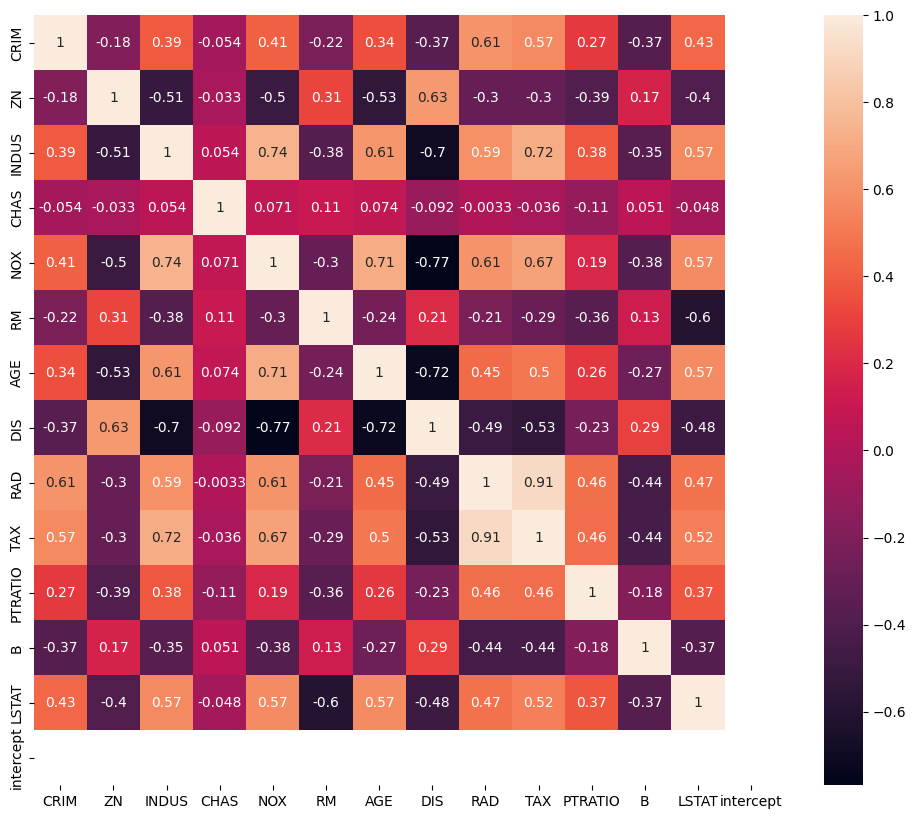

In [88]:
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(),annot=True)

## Homoscedasticity

"Homoscedasticity, also known as equal variance, is an assumption of linear regression that the residuals have constant variance across the range of the predictor variables. In other words, the variance of the errors should be the same for all values of the independent variables. 

__Residual plots:__
A residual plot is a scatter plot of the residuals against the predicted values. If the points in the plot are randomly scattered around the horizontal axis and there is no pattern or trend, then it indicates that the assumption of homoscedasticity is met. If there is a funnel shape or any other pattern in the plot, it suggests heteroscedasticity.
Goldfeld-Quandt test is a statistical hypothesis test used to determine if the variances of two groups in a regression model are equal or not. Specifically, it tests the null hypothesis that the variances of the error terms in a regression model are the same for two different subsets of the data.

__The Goldfeld-Quandt test__

The Goldfeld-Quandt test is commonly used in econometrics, where it is important to check the assumption of homoscedasticity, or equal variance of the error terms, in a regression model. The test involves dividing the data into two groups based on a chosen variable, such as the value of an independent variable, and then estimating the regression equation separately for each group. The test statistic is then calculated based on the ratio of the variances of the residuals from the two regressions, and compared to a critical value from the F distribution to determine if the null hypothesis can be rejected or not.

If the test statistic is greater than the critical value, the null hypothesis is rejected, indicating that the variances are not equal and that there is heteroscedasticity in the data. On the other hand, if the test statistic is less than the critical value, the null hypothesis cannot be rejected, indicating that the variances are equal and that the assumption of homoscedasticity is met."


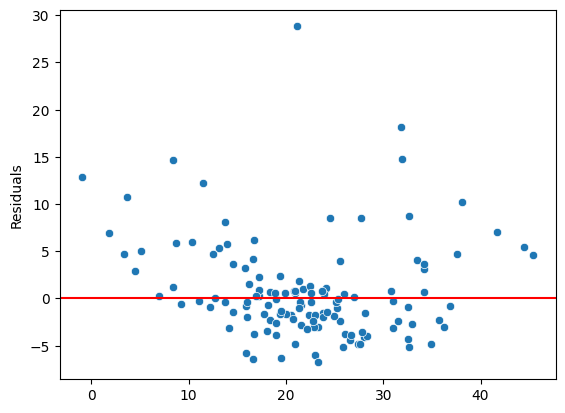

In [90]:
y_pred = model.predict(x_test)
sns.scatterplot(x=y_pred.flatten(),y=df_results['Residuals'])
plt.axhline(y=0, color='r', linestyle='-')

#### Goldfeld Quandt Test
Checking heteroscedasticity : Using Goldfeld Quandt we test for heteroscedasticity.

- Null Hypothesis: Error terms are homoscedastic
- Alternative Hypothesis: Error terms are heteroscedastic.

In [92]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(df_results['Residuals'], x_test)
lzip(name, test)

[('F statistic', 2.108252569601236), ('p-value', 0.004507351570586458)]

since p value is less than 0.05 we reject the null hypothesis

### Autocorrelation

" There are several methods to detect autocorrelation in a regression model, including:

Durbin-Watson test: The Durbin-Watson test is a statistical test that can be used to detect first-order autocorrelation in the residuals. The test statistic ranges from 0 to 4, with a value of 2 indicating no autocorrelation. Values closer to 0 indicate positive autocorrelation, while values closer to 4 indicate negative autocorrelation.

Autocorrelation function (ACF) and partial autocorrelation function (PACF): The ACF and PACF are plots that show the correlation between the residuals at different lags. If there is a significant correlation at a lag of 1, it suggests first-order autocorrelation.

Residual plots: Residual plots can also be used to detect autocorrelation. If there is a pattern or trend in the residual plot, it suggests the presence of autocorrelation."


In [94]:
from statsmodels.stats.stattools import durbin_watson
print('\nPerforming Durbin-Watson Test')
print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
print('0 to 2< is positive autocorrelation')
print('>2 to 4 is negative autocorrelation')
print('-------------------------------------')
durbinWatson = durbin_watson(df_results['Residuals'])
print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.8233343070088261
Little to no autocorrelation 

Assumption satisfied
